In [1]:
!git clone https://github.com/svip-lab/HRNet-for-Fashion-Landmark-Estimation.PyTorch.git


Cloning into 'HRNet-for-Fashion-Landmark-Estimation.PyTorch'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 127 (delta 24), reused 15 (delta 15), pack-reused 92 (from 1)
Receiving objects: 100% (127/127), 702.98 KiB | 15.98 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [2]:
%cd HRNet-for-Fashion-Landmark-Estimation.PyTorch


/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch


In [3]:
!pip install -r requirements.txt


  Preparing metadata (setup.py) ... done
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.2.0.32 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.2.0.32


In [4]:
!pip install yacs opencv-python matplotlib tqdm pycocotools


In [5]:
%cd lib
!make
%cd ..


/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/lib
cd nms; python setup_linux.py build_ext --inplace; rm -rf build; cd ../../
running build_ext
Compiling cpu_nms.pyx because it changed.
[1/1] Cythonizing cpu_nms.pyx
/usr/local/lib/python3.12/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/lib/nms/cpu_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)

Error compiling Cython file:
------------------------------------------------------------
...
    cdef np.ndarray[np.float32_t, ndim=1] x2 = dets[:, 2]
    cdef np.ndarray[np.float32_t, ndim=1] y2 = dets[:, 3]
    cdef np.ndarray[np.float32_t, ndim=1] scores = dets[:, 4]

    cdef np.ndarray[np.float32_t, ndim=1] areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    cdef np.ndarray[np.int_t, ndim=1] order = scores.argsort()[::-1].astype('i')
             

In [6]:
!mkdir -p models


In [26]:
!mkdir -p models
!mv "/content/drive/MyDrive/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017 (1) (1).pth" \
    "models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth"


In [27]:
!ls models


pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth


In [28]:
import os
import sys

ROOT = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch"
LIB = os.path.join(ROOT, "lib")

sys.path.insert(0, ROOT)
sys.path.insert(0, LIB)

print("PYTHONPATH fixed")


PYTHONPATH fixed


In [29]:
!ls lib/models


__init__.py  pose_hrnet.py  pose_resnet.py  __pycache__


In [30]:
import sys
import types
import os

ROOT = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch"
LIB_MODELS_PATH = os.path.join(ROOT, "lib", "models")

# Create empty module called "models"
models_module = types.ModuleType("models")
models_module.__path__ = [LIB_MODELS_PATH]

# Register it
sys.modules["models"] = models_module

print("Fake 'models' package created and linked")


Fake 'models' package created and linked


In [31]:
import sys
import importlib

# import lib.models first
lib_models = importlib.import_module("lib.models")

# alias it as "models"
sys.modules["models"] = lib_models

print("models → lib.models alias created")


models → lib.models alias created


In [32]:
from lib.config import cfg
from lib.config import update_config
from lib.models.pose_hrnet import get_pose_net
from lib.core.inference import get_final_preds
from lib.utils.transforms import get_affine_transform


In [33]:
from lib.config import cfg
from lib.config import update_config
from lib.models.pose_hrnet import get_pose_net


In [34]:
class Args:
    cfg = "experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"
    opts = []

args = Args()


In [35]:
class Args:
    def __init__(self):
        self.cfg = "experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"
        self.opts = []
        self.modelDir = ""
        self.logDir = ""
        self.dataDir = ""

args = Args()
print("Args object created")


Args object created


In [36]:
from lib.config import cfg, update_config

update_config(cfg, args)
cfg.freeze()

print("Config loaded successfully")


Config loaded successfully


In [37]:
from lib.models.pose_hrnet import get_pose_net


In [38]:
import torch

model_path = "models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth"

model = get_pose_net(cfg, is_train=False)
model.load_state_dict(torch.load(model_path))
model = model.cuda()
model.eval()

print("HRNet model loaded successfully 🚀")


HRNet model loaded successfully 🚀


testing for shirt

In [39]:
%cd /content/HRNet-for-Fashion-Landmark-Estimation.PyTorch


/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch


In [40]:
import sys, os, types

ROOT = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch"
LIB_MODELS = os.path.join(ROOT, "lib", "models")

# fake `models` package → points to lib/models
models_module = types.ModuleType("models")
models_module.__path__ = [LIB_MODELS]
sys.modules["models"] = models_module

# add root to path
sys.path.insert(0, ROOT)

print("✅ HRNet import environment fixed")


✅ HRNet import environment fixed


In [41]:
from lib.config import cfg
from lib.models.pose_hrnet import get_pose_net
from lib.core.inference import get_final_preds
from lib.utils.transforms import get_affine_transform


In [42]:
from types import SimpleNamespace

args = SimpleNamespace(
    cfg="experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml",
    opts=[],
    modelDir="",
    logDir="",
    dataDir=""
)

from lib.config import update_config
update_config(cfg, args)

print("✅ Config loaded")


✅ Config loaded


In [43]:
import torch

model_path = "models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth"

model = get_pose_net(cfg, is_train=False)
model.load_state_dict(torch.load(model_path, map_location="cuda"))
model = model.cuda()
model.eval()

print("✅ HRNet model loaded")


✅ HRNet model loaded


In [44]:
import cv2
import numpy as np

img = cv2.imread("/content/drive/MyDrive/blackjeans2.jpeg")   # change if pant
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape
center = np.array([w / 2, h / 2], dtype=np.float32)
scale = max(h, w) / 200

trans = get_affine_transform(center, scale, 0, cfg.MODEL.IMAGE_SIZE)

input_img = cv2.warpAffine(
    img,
    trans,
    (cfg.MODEL.IMAGE_SIZE[0], cfg.MODEL.IMAGE_SIZE[1]),
    flags=cv2.INTER_LINEAR
)

input_img = input_img.astype(np.float32) / 255.0
input_img = torch.from_numpy(input_img).permute(2, 0, 1).unsqueeze(0).cuda()


6.4


In [45]:
with torch.no_grad():
    output = model(input_img)

preds, _ = get_final_preds(
    cfg,
    output.cpu().numpy(),
    np.array([center]),
    np.array([scale])
)

points = preds[0]
print("Landmark points:", points.shape)


Landmark points: (294, 2)


(np.float64(-0.5), np.float64(1279.5), np.float64(915.5), np.float64(-0.5))

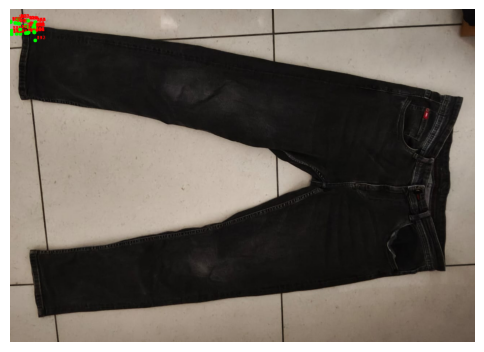

In [46]:
import matplotlib.pyplot as plt

for i, (x, y) in enumerate(points):
    cv2.circle(img, (int(x), int(y)), 5, (0,255,0), -1)
    cv2.putText(
        img, str(i),
        (int(x)+4, int(y)-4),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4, (255,0,0), 1
    )

plt.figure(figsize=(6,10))
plt.imshow(img)
plt.axis("off")


trial2

In [47]:
import sys
import types
import os

ROOT = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch"
LIB_MODELS_PATH = os.path.join(ROOT, "lib", "models")

# fake `models` package
models_module = types.ModuleType("models")
models_module.__path__ = [LIB_MODELS_PATH]
sys.modules["models"] = models_module

# add repo root
sys.path.insert(0, ROOT)


In [48]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from lib.config import cfg
from lib.models.pose_hrnet import PoseHighResolutionNet
from lib.core.inference import get_final_preds
from lib.utils.transforms import get_affine_transform


In [49]:
cfg_file = "experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"
cfg.defrost()
cfg.merge_from_file(cfg_file)
cfg.freeze()


In [50]:
model_path = "models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth"

model = PoseHighResolutionNet(cfg)
state_dict = torch.load(model_path, map_location="cpu")
model.load_state_dict(state_dict, strict=False)

model = model.cuda()
model.eval()


PoseHighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv

In [51]:
img = cv2.imread("/content/drive/MyDrive/bluejeansbgr.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape


In [52]:
center = np.array([w / 2, h / 2], dtype=np.float32)
scale = max(h, w) / 200.0

trans = get_affine_transform(center, scale, 0, cfg.MODEL.IMAGE_SIZE)

input_img = cv2.warpAffine(
    img,
    trans,
    (cfg.MODEL.IMAGE_SIZE[0], cfg.MODEL.IMAGE_SIZE[1]),
    flags=cv2.INTER_LINEAR
)

input_img = input_img.astype(np.float32) / 255.0
input_img = torch.from_numpy(input_img).permute(2, 0, 1).unsqueeze(0).cuda()


3.29


In [53]:
with torch.no_grad():
    output = model(input_img)

preds, _ = get_final_preds(
    cfg,
    output.cpu().numpy(),
    np.array([center]),
    np.array([scale])
)

points = preds[0]


(np.float64(-0.5), np.float64(481.5), np.float64(657.5), np.float64(-0.5))

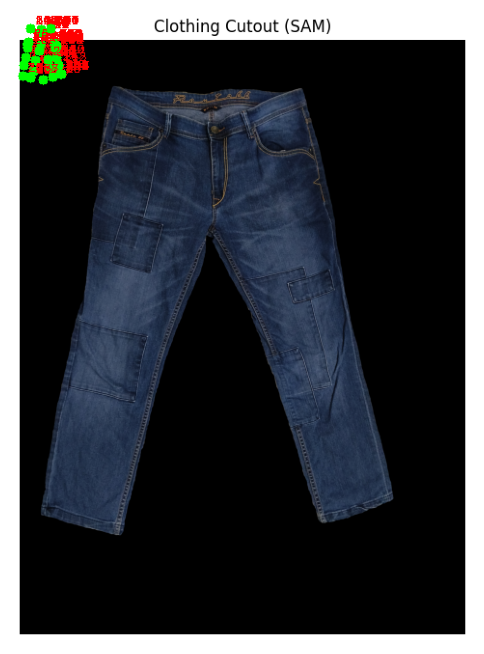

In [54]:
vis = img.copy()

for i, (x, y) in enumerate(points):
    cv2.circle(vis, (int(x), int(y)), 5, (0, 255, 0), -1)
    cv2.putText(
        vis, str(i),
        (int(x) + 5, int(y) - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4, (255, 0, 0), 1
    )

plt.figure(figsize=(6, 10))
plt.imshow(vis)
plt.axis("off")


(np.float64(-0.5), np.float64(481.5), np.float64(657.5), np.float64(-0.5))

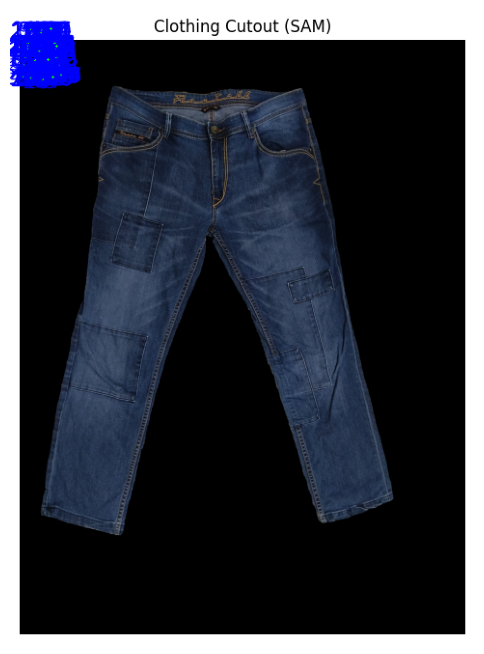

In [55]:
vis = img.copy()

for i, (x, y) in enumerate(points):
    x, y = int(x), int(y)

    # 🔴 Large center point
    cv2.circle(vis, (x, y), 1, (0, 255, 0), -1)

    # 🔢 Centered index text
    text = str(i)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 1

    (tw, th), _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_x = x - tw // 2
    text_y = y + th // 2

    cv2.putText(
        vis,
        text,
        (text_x, text_y),
        font,
        font_scale,
        (0, 0, 255),   # red text
        thickness,
        cv2.LINE_AA
    )

plt.figure(figsize=(6, 10))
plt.imshow(vis)
plt.axis("off")


using SAM3



In [56]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")

!nvidia-smi
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

Sat Dec 20 17:13:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             28W /   70W |     448MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [57]:
!git clone https://github.com/facebookresearch/sam3.git
%cd sam3
!pip install -e ".[notebooks]"
%cd /content

Cloning into 'sam3'...
remote: Enumerating objects: 620, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 620 (delta 24), reused 21 (delta 21), pack-reused 588 (from 2)
Receiving objects: 100% (620/620), 58.95 MiB | 47.49 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/sam3
Obtaining file:///content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/sam3
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requ

/content


In [1]:
import torch

torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True


In [2]:
import glob
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor

# search for the bpe file in the repo (adjust root if needed)
paths = glob.glob('/content/**/bpe_simple_vocab_16e6.txt.gz', recursive=True)
if not paths:
    raise FileNotFoundError("bpe_simple_vocab_16e6.txt.gz not found. Check paths.")
bpe_path = paths[0]

model = build_sam3_image_model(bpe_path=bpe_path)
processor = Sam3Processor(model, confidence_threshold=0.3)


config.json:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

sam3.pt:   0%|          | 0.00/3.45G [00:00<?, ?B/s]

In [3]:
!pip install -q supervision jupyter_bbox_widget
import supervision as sv

def from_sam(sam_result: dict) -> sv.Detections:
    xyxy = sam_result["boxes"].to(torch.float32).cpu().numpy()
    confidence = sam_result["scores"].to(torch.float32).cpu().numpy()

    mask = sam_result["masks"].to(torch.bool)
    mask = mask.reshape(mask.shape[0], mask.shape[2], mask.shape[3]).cpu().numpy()

    return sv.Detections(
        xyxy=xyxy,
        confidence=confidence,
        mask=mask
    )
import supervision as sv
from PIL import Image
from typing import Optional


COLOR = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])


def annotate(image: Image.Image, detections: sv.Detections, label: Optional[str] = None) -> Image.Image:
    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)

    mask_annotator = sv.MaskAnnotator(
        color=COLOR,
        color_lookup=sv.ColorLookup.INDEX,
        opacity=0.6
    )
    box_annotator = sv.BoxAnnotator(
        color=COLOR,
        color_lookup=sv.ColorLookup.INDEX,
        thickness=1
    )
    label_annotator = sv.LabelAnnotator(
        color=COLOR,
        color_lookup=sv.ColorLookup.INDEX,
        text_scale=0.4,
        text_padding=5,
        text_color=sv.Color.BLACK,
        text_thickness=1
    )

    annotated_image = image.copy()
    annotated_image = mask_annotator.annotate(annotated_image, detections)
    annotated_image = box_annotator.annotate(annotated_image, detections)

    if label:
        labels = [
            f"{label} {confidence:.2f}"
            for confidence in detections.confidence
        ]
        annotated_image = label_annotator.annotate(annotated_image, detections, labels)

    return annotated_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 7.3 MB/s eta 0:00:00


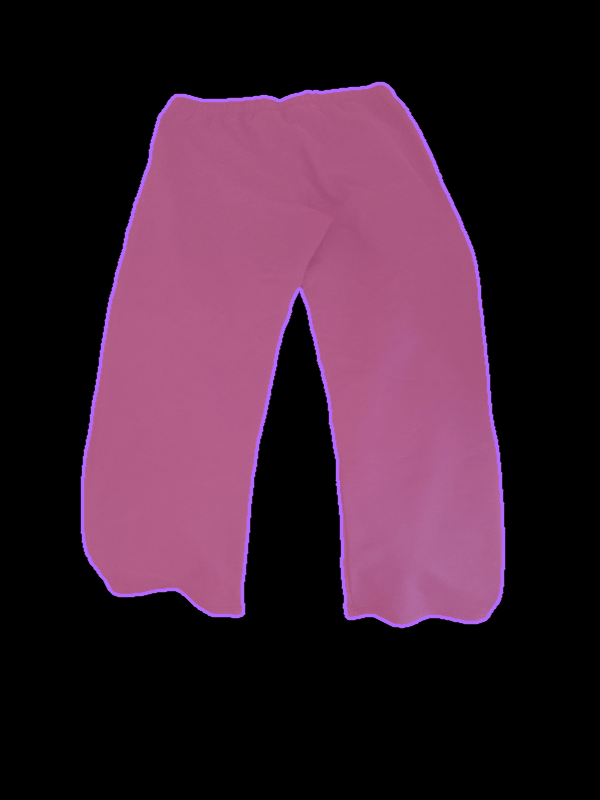

----- PIXEL MEASUREMENTS -----
waist (px):           221
outseam (px):         450
ankle (px):           176
inseam (px):          308

----- RATIOS (relative to waist px) -----
ratio waist -> outseam :  2.0361990950226243
ratio waist -> ankle   :  0.7963800904977375
ratio waist -> inseam  :  1.3936651583710407

Enter measured waist (numeric) to convert pixels → real units (leave blank to skip): 30

----- ESTIMATED SIZES (based on waist=30.0 in) -----
Estimated outseam : 30.54 in
Estimated ankle   : 11.95 in
Estimated inseam  : 20.90 in


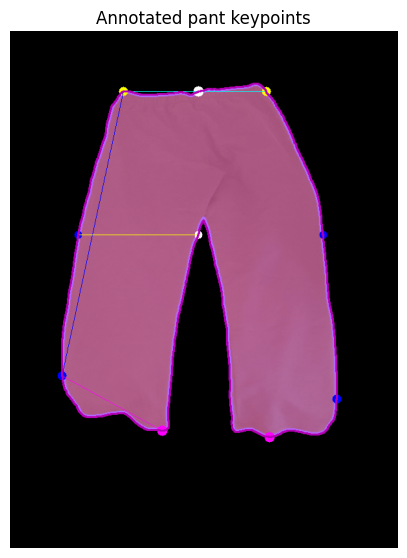

In [4]:
from PIL import Image
import numpy as np
import cv2
from IPython.display import display

# Configuration
TARGET_SIZE = (600, 800)   # (width, height)
IMAGE_PATH = "/content/drive/MyDrive/bluetrack.jpg"
PROMPT = "pant"
PINK = (255, 105, 180)     # RGB pink for overlay/outline
ALPHA = 0.55               # overlay strength (0.0..1.0)

# 1) load + resize image
image = Image.open(IMAGE_PATH).convert("RGB")
image = image.resize(TARGET_SIZE)            # PIL expects (W,H)
img_np = np.array(image)                    # shape (H, W, 3)
H, W = img_np.shape[:2]

# 2) run SAM inference (using your processor/from_sam)
inference_state = processor.set_image(image)
inference_state = processor.set_text_prompt(state=inference_state, prompt=PROMPT)
detections = from_sam(sam_result=inference_state)
# if the wrapper provides a DataFrame-like filter earlier, keep behavior
try:
    # some wrappers returned an array-like that supports boolean indexing by confidence
    detections = detections[detections.confidence > 0.5]
except Exception:
    pass

# --- helper: robust mask extraction (handles many formats) ---
def extract_mask_from_det(det):
    if hasattr(det, "mask"):
        return np.asarray(det.mask)
    if isinstance(det, dict):
        for key in ("mask", "masks", "segmentation", "segm", "pred_mask", "pred_masks"):
            if key in det:
                return np.asarray(det[key])
        for key in det.keys():
            if "mask" in key or "seg" in key:
                return np.asarray(det[key])
    if isinstance(det, (tuple, list)):
        for item in det:
            try:
                arr = np.asarray(item)
            except Exception:
                arr = None
            if isinstance(arr, np.ndarray) and arr.ndim >= 2:
                return arr
    try:
        arr = np.asarray(det)
        if isinstance(arr, np.ndarray) and arr.ndim >= 2:
            return arr
    except Exception:
        pass
    return None

def normalize_mask_array(raw_mask, expected_shape=(H, W)):
    m = np.asarray(raw_mask)
    # collapse leading / trailing singletons
    if m.ndim == 3 and m.shape[0] == 1 and m.shape[1:] == expected_shape:
        m = np.squeeze(m, axis=0)
    if m.ndim == 3 and m.shape[2] == 1 and m.shape[:2] == expected_shape:
        m = np.squeeze(m, axis=2)
    # if swapped (W,H), transpose
    if m.ndim == 2 and m.shape == (expected_shape[1], expected_shape[0]):
        m = m.T
    # if still mismatched, try resizing nearest-neighbor
    if m.ndim == 2 and m.shape != expected_shape:
        try:
            m_uint8 = (m * 255).astype(np.uint8) if m.max() <= 1.0 else m.astype(np.uint8)
            m_resized = cv2.resize(m_uint8, (expected_shape[1], expected_shape[0]), interpolation=cv2.INTER_NEAREST)
            return (m_resized > 127)
        except Exception as e:
            raise ValueError(f"Cannot coerce mask shape {m.shape} to {expected_shape}: {e}")
    if m.dtype != bool:
        if np.issubdtype(m.dtype, np.floating):
            m = m > 0.5
        else:
            m = m != 0
    return m.astype(bool)

# 3) extract masks for every detection
masks = []
for i, det in enumerate(detections):
    m_raw = extract_mask_from_det(det)
    if m_raw is None:
        continue
    try:
        m_norm = normalize_mask_array(m_raw, expected_shape=(H, W))
    except Exception:
        # fallback: force-resize from raw array
        try:
            m_uint8 = (np.asarray(m_raw) * 255).astype(np.uint8) if np.asarray(m_raw).max() <= 1.0 else np.asarray(m_raw).astype(np.uint8)
            m_resized = cv2.resize(m_uint8, (W, H), interpolation=cv2.INTER_NEAREST)
            m_norm = (m_resized > 127)
        except Exception:
            continue
    masks.append(m_norm)

if len(masks) == 0:
    raise RuntimeError("No valid masks extracted from detections. Check detection output format.")

# 4) choose largest mask (pant)
areas = [int(m.sum()) for m in masks]
best_idx = int(np.argmax(areas))
best_mask = masks[best_idx]   # boolean (H, W)

# 5) create black background and tinted pant result
black_bg = np.zeros_like(img_np)   # black background
result = black_bg.copy().astype(np.uint8)

# preserve texture by blending original pixel + pink overlay where mask True
pink_arr = np.zeros_like(img_np, dtype=np.uint8)
pink_arr[:, :] = PINK  # shape (H, W, 3)

# blending only on mask
alpha = float(ALPHA)
# compute blended pixels
blended = (img_np.astype(np.float32) * (1.0 - alpha) + pink_arr.astype(np.float32) * alpha).astype(np.uint8)
result[best_mask] = blended[best_mask]

# 6) optionally draw pink contour around the mask for emphasis
mask_uint8 = (best_mask.astype(np.uint8) * 255)
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outline_color = (int(PINK[2]), int(PINK[1]), int(PINK[0]))  # cv2 uses BGR
cv2.drawContours(result, contours, -1, outline_color, thickness=2, lineType=cv2.LINE_AA)

# 7) display the result (no saving)
out_img = Image.fromarray(result)
display(out_img)

# ---------- Measurements from in-memory `result` (SAM3 output) ----------
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# assume `result` is available: np.array(uint8) shape (H,W,3) in RGB
img = result.astype(np.uint8).copy()
# if result was BGR, convert to RGB; otherwise this is fine – detect by max channel order heuristic
# (If colors look wrong, swap channels with img = img[:,:,::-1])
H0, W0 = img.shape[:2]

# Resize to target like earlier (600x800) to match pipeline
TARGET_W, TARGET_H = 600, 800
img = cv2.resize(img, (TARGET_W, TARGET_H), interpolation=cv2.INTER_LINEAR)
H, W = img.shape[:2]

# create binary mask (non-black = pant)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
mask = (gray > 10).astype(np.uint8) * 255  # 0/255

ys, xs = np.where(mask >= 100)
if len(xs) == 0:
    raise RuntimeError("Mask empty — check that `result` contains the pant on non-black background.")

x_min, x_max = int(xs.min()), int(xs.max())
y_min, y_max = int(ys.min()), int(ys.max())
h = y_max - y_min
w = x_max - x_min

# WAIST: scan top band for a wide row
top_band_h = max(1, int(h * 0.12))
waist_row = None
min_width_needed = max(10, int(w * 0.5))
wl_x = wr_x = None
for dy in range(top_band_h):
    row = y_min + dy
    cols = np.where(mask[row] >= 100)[0]
    if cols.size and (cols.max() - cols.min() >= min_width_needed):
        waist_row = row
        wl_x = int(cols.min()); wr_x = int(cols.max())
        break
if waist_row is None:
    waist_row = y_min
    cols = np.where(mask[waist_row] >= 100)[0]
    wl_x = int(cols.min()); wr_x = int(cols.max())

waist_left = (wl_x, waist_row)
waist_right = (wr_x, waist_row)

# CROTCH: narrowest row in mid band
band_y0 = y_min + int(0.15 * h)
band_y1 = min(y_min + int(0.65 * h), y_max)
best_row = None; best_width = None
for row in range(band_y0, max(band_y0+1, band_y1+1)):
    cols = np.where(mask[row] >= 100)[0]
    if cols.size:
        width = cols.max() - cols.min()
        if best_width is None or width < best_width:
            best_width = width
            best_row = row

if best_row is not None:
    cols = np.where(mask[best_row] >= 100)[0]
    crotch_x = int((cols.min() + cols.max()) / 2)
    col_pixels = np.where(mask[:, crotch_x] >= 100)[0]
    if col_pixels.size:
        crotch_y_top = int(col_pixels.min())
        crotch_y_bottom = int(col_pixels.max())
    else:
        crotch_y_top = best_row
        crotch_y_bottom = best_row
else:
    crotch_x = int((x_min + x_max) / 2)
    crotch_y_top = int(y_min + 0.4 * h)
    crotch_y_bottom = crotch_y_top

crotch_point  = (crotch_x, crotch_y_top)
crotch_point2 = (crotch_x, crotch_y_bottom)

# ANKLES: split mask by crotch_x and take bottom-most point per half
def bottom_most_point(binary_half):
    ys_h, xs_h = np.where(binary_half >= 100)
    if len(xs_h) == 0:
        return None
    maxy = int(np.max(ys_h))
    xs_at_maxy = xs_h[ys_h == maxy]
    return (int(np.median(xs_at_maxy)), maxy)

left_half = mask.copy(); left_half[:, crotch_x:] = 0
right_half = mask.copy(); right_half[:, :crotch_x+1] = 0
left_ankle = bottom_most_point(left_half)
right_ankle = bottom_most_point(right_half)

# fallback if one side missing
if left_ankle is None or right_ankle is None:
    mid_x = int((x_min + x_max) / 2)
    left_half = mask.copy(); left_half[:, mid_x:] = 0
    right_half = mask.copy(); right_half[:, :mid_x+1] = 0
    l = bottom_most_point(left_half); r = bottom_most_point(right_half)
    if left_ankle is None:
        left_ankle = l
    if right_ankle is None:
        right_ankle = r

if left_ankle is None or right_ankle is None:
    raise RuntimeError("Could not determine ankle points — mask may be invalid.")

inner_x, inner_y = left_ankle
inner_x1, inner_y1 = right_ankle

# OUTER ankles: x-min and x-max bottom-most
ys_at_xmin = ys[xs == x_min]
ys_at_xmax = ys[xs == x_max]
y_correct = int(np.max(ys_at_xmin)) if ys_at_xmin.size else int(np.max(ys))
y_correct2 = int(np.max(ys_at_xmax)) if ys_at_xmax.size else int(np.max(ys))
outer_ankle = (x_min, y_correct)
outer_ankle2 = (x_max, y_correct2)

# left/right at crotch_y_bottom
y_axis = crotch_point2[1]
cols = np.where(mask[y_axis] >= 100)[0]
if cols.size:
    left_pt = (int(cols.min()), y_axis)
    right_pt = (int(cols.max()), y_axis)
else:
    left_pt = (x_min, y_axis)
    right_pt = (x_max, y_axis)

# VISUALIZATION (annotate a copy)
draw = img.copy()
def safe_circle(img_arr, pt, color_bgr, r=6, fill=-1):
    if pt is None:
        return
    cv2.circle(img_arr, (int(pt[0]), int(pt[1])), r, color_bgr, thickness=fill)

# colors BGR
WHITE = (255,255,255); MAGENTA=(255,0,255); CYAN=(255,255,0); RED=(0,0,255); YELLOW=(0,255,255)
safe_circle(draw, crotch_point, WHITE, r=8)
safe_circle(draw, crotch_point2, WHITE, r=6)
safe_circle(draw, left_ankle, MAGENTA, r=8)
safe_circle(draw, right_ankle, MAGENTA, r=8)
safe_circle(draw, waist_left, CYAN, r=7) if 'waist_left' in locals() else safe_circle(draw, waist_left, CYAN, r=7)
safe_circle(draw, waist_right, CYAN, r=7) if 'waist_right' in locals() else None
safe_circle(draw, outer_ankle, RED, r=7)
safe_circle(draw, outer_ankle2, RED, r=7)
safe_circle(draw, left_pt, RED, r=6)
safe_circle(draw, right_pt, RED, r=6)

cv2.line(draw, waist_left, outer_ankle, RED, 1)
cv2.line(draw, waist_left, waist_right, YELLOW, 1)
cv2.line(draw, outer_ankle, left_ankle, MAGENTA, 1)
cv2.line(draw, crotch_point2, left_pt, (255,255,0), 1)

# contour overlay
mask_uint8 = (mask > 0).astype(np.uint8) * 255
contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(draw, contours, -1, (180,0,180), 2)

# PIXEL DISTANCES
pixel_count_waist = int(abs(wr_x - wl_x))
pixel_count_height = int(np.hypot(outer_ankle[0] - wl_x, outer_ankle[1] - waist_row))
pixel_count_ankle = int(np.hypot(outer_ankle[0] - inner_x, outer_ankle[1] - inner_y))
pixel_count_inseam = int(np.hypot(inner_x - crotch_x, inner_y - crotch_point2[1]))

print("----- PIXEL MEASUREMENTS -----")
print("waist (px):          ", pixel_count_waist)
print("outseam (px):        ", pixel_count_height)
print("ankle (px):          ", pixel_count_ankle)
print("inseam (px):         ", pixel_count_inseam)

# RATIOS relative to waist
ratio_waist_length = (pixel_count_height / pixel_count_waist) if pixel_count_waist else None
ratio_waist_ankle  = (pixel_count_ankle / pixel_count_waist) if pixel_count_waist else None
ratio_waist_inseam = (pixel_count_inseam / pixel_count_waist) if pixel_count_waist else None

print("\n----- RATIOS (relative to waist px) -----")
print("ratio waist -> outseam : ", ratio_waist_length)
print("ratio waist -> ankle   : ", ratio_waist_ankle)
print("ratio waist -> inseam  : ", ratio_waist_inseam)

# ASK USER for real waist measurement to convert ratios to actual units (optional)
try:
    c_input = input("\nEnter measured waist (numeric) to convert pixels → real units (leave blank to skip): ").strip()
    if c_input == "":
        c_val = None
    else:
        c_val = float(c_input)
except Exception:
    c_val = None

unit = "in"


if c_val is not None and ratio_waist_length is not None:
    est_outseam = ratio_waist_length *( c_val/2)
    est_ankle   = ratio_waist_ankle * (c_val/2) if ratio_waist_ankle is not None else None
    est_inseam  = ratio_waist_inseam * (c_val/2) if ratio_waist_inseam is not None else None

    print(f"\n----- ESTIMATED SIZES (based on waist={c_val} {unit}) -----")
    print(f"Estimated outseam : {est_outseam:.2f} {unit}")
    if est_ankle is not None: print(f"Estimated ankle   : {est_ankle:.2f} {unit}")
    if est_inseam is not None: print(f"Estimated inseam  : {est_inseam:.2f} {unit}")
else:
    print("\nNo real waist entered — skipping real-unit estimates.")

# SHOW annotated image (RGB)
plt.figure(figsize=(5,8))
plt.imshow(draw)
plt.axis("off")
plt.title("Annotated pant keypoints")
plt.show()


trying  SAM+hrnet

In [15]:
import argparse
import sys

# 🔴 DEFINE THIS (missing line)
cfg_file = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"

sys.path.append("/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/lib")

from config import cfg, update_config

args = argparse.Namespace(
    cfg=cfg_file,
    opts=[],
    modelDir='',
    logDir='',
    dataDir='',
    prevModelDir=''
)

update_config(cfg, args)


In [16]:
import argparse

args = argparse.Namespace(
    cfg=cfg_file,
    opts=[],
    modelDir='',
    logDir='',
    dataDir='',
    prevModelDir=''
)

from config import cfg, update_config
update_config(cfg, args)


In [17]:
import models

hrnet = models.pose_hrnet.get_pose_net(cfg, is_train=False)
hrnet.eval()


PoseHighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv

In [18]:
hrnet.load_state_dict(
    torch.load(
        "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth",
        map_location="cpu"
    ),
    strict=False
)


<All keys matched successfully>

In [19]:
ls /content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/experiments/deepfashion2/hrnet/


w48_384x288_adam_lr1e-3.yaml


In [20]:
import argparse
import sys

sys.path.append("/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/lib")

from config import cfg, update_config

cfg_file = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"

args = argparse.Namespace(
    cfg=cfg_file,
    opts=[],
    modelDir='',
    logDir='',
    dataDir='',
    prevModelDir=''
)

update_config(cfg, args)


In [21]:
import models
import torch

hrnet = models.pose_hrnet.get_pose_net(cfg, is_train=False)
hrnet.eval()


PoseHighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv

In [22]:
hrnet.load_state_dict(
    torch.load(
        "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth",
        map_location="cpu"
    ),
    strict=False
)


<All keys matched successfully>

In [103]:
img = cv2.imread("/content/000006.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

H, W = img.shape[:2]

inp = cv2.resize(img, (288, 384))  # (W, H)
inp = inp.astype(np.float32) / 255.0
inp = inp.transpose(2, 0, 1)
inp = torch.from_numpy(inp).unsqueeze(0)


In [104]:
with torch.no_grad():
    out = hrnet(inp)   # [1, num_joints, 96, 72]


In [105]:
heatmaps = out.squeeze(0).cpu().numpy()
hm_h, hm_w = heatmaps.shape[1:]

points = []
for hm in heatmaps:
    y, x = np.unravel_index(np.argmax(hm), hm.shape)

    x_img = x * W / hm_w
    y_img = y * H / hm_h

    points.append((x_img, y_img))


In [106]:
with torch.no_grad():
    out = hrnet(inp)   # shape: [1, num_joints, 96, 72]


In [107]:
heatmaps = out.squeeze(0).cpu().numpy()
hm_h, hm_w = heatmaps.shape[1:]

points = []
for i, hm in enumerate(heatmaps):
    y, x = np.unravel_index(np.argmax(hm), hm.shape)

    # map heatmap → original image
    x_img = x * W / hm_w
    y_img = y * H / hm_h

    points.append((x_img, y_img))


(-0.5, 467.5, 623.5, -0.5)

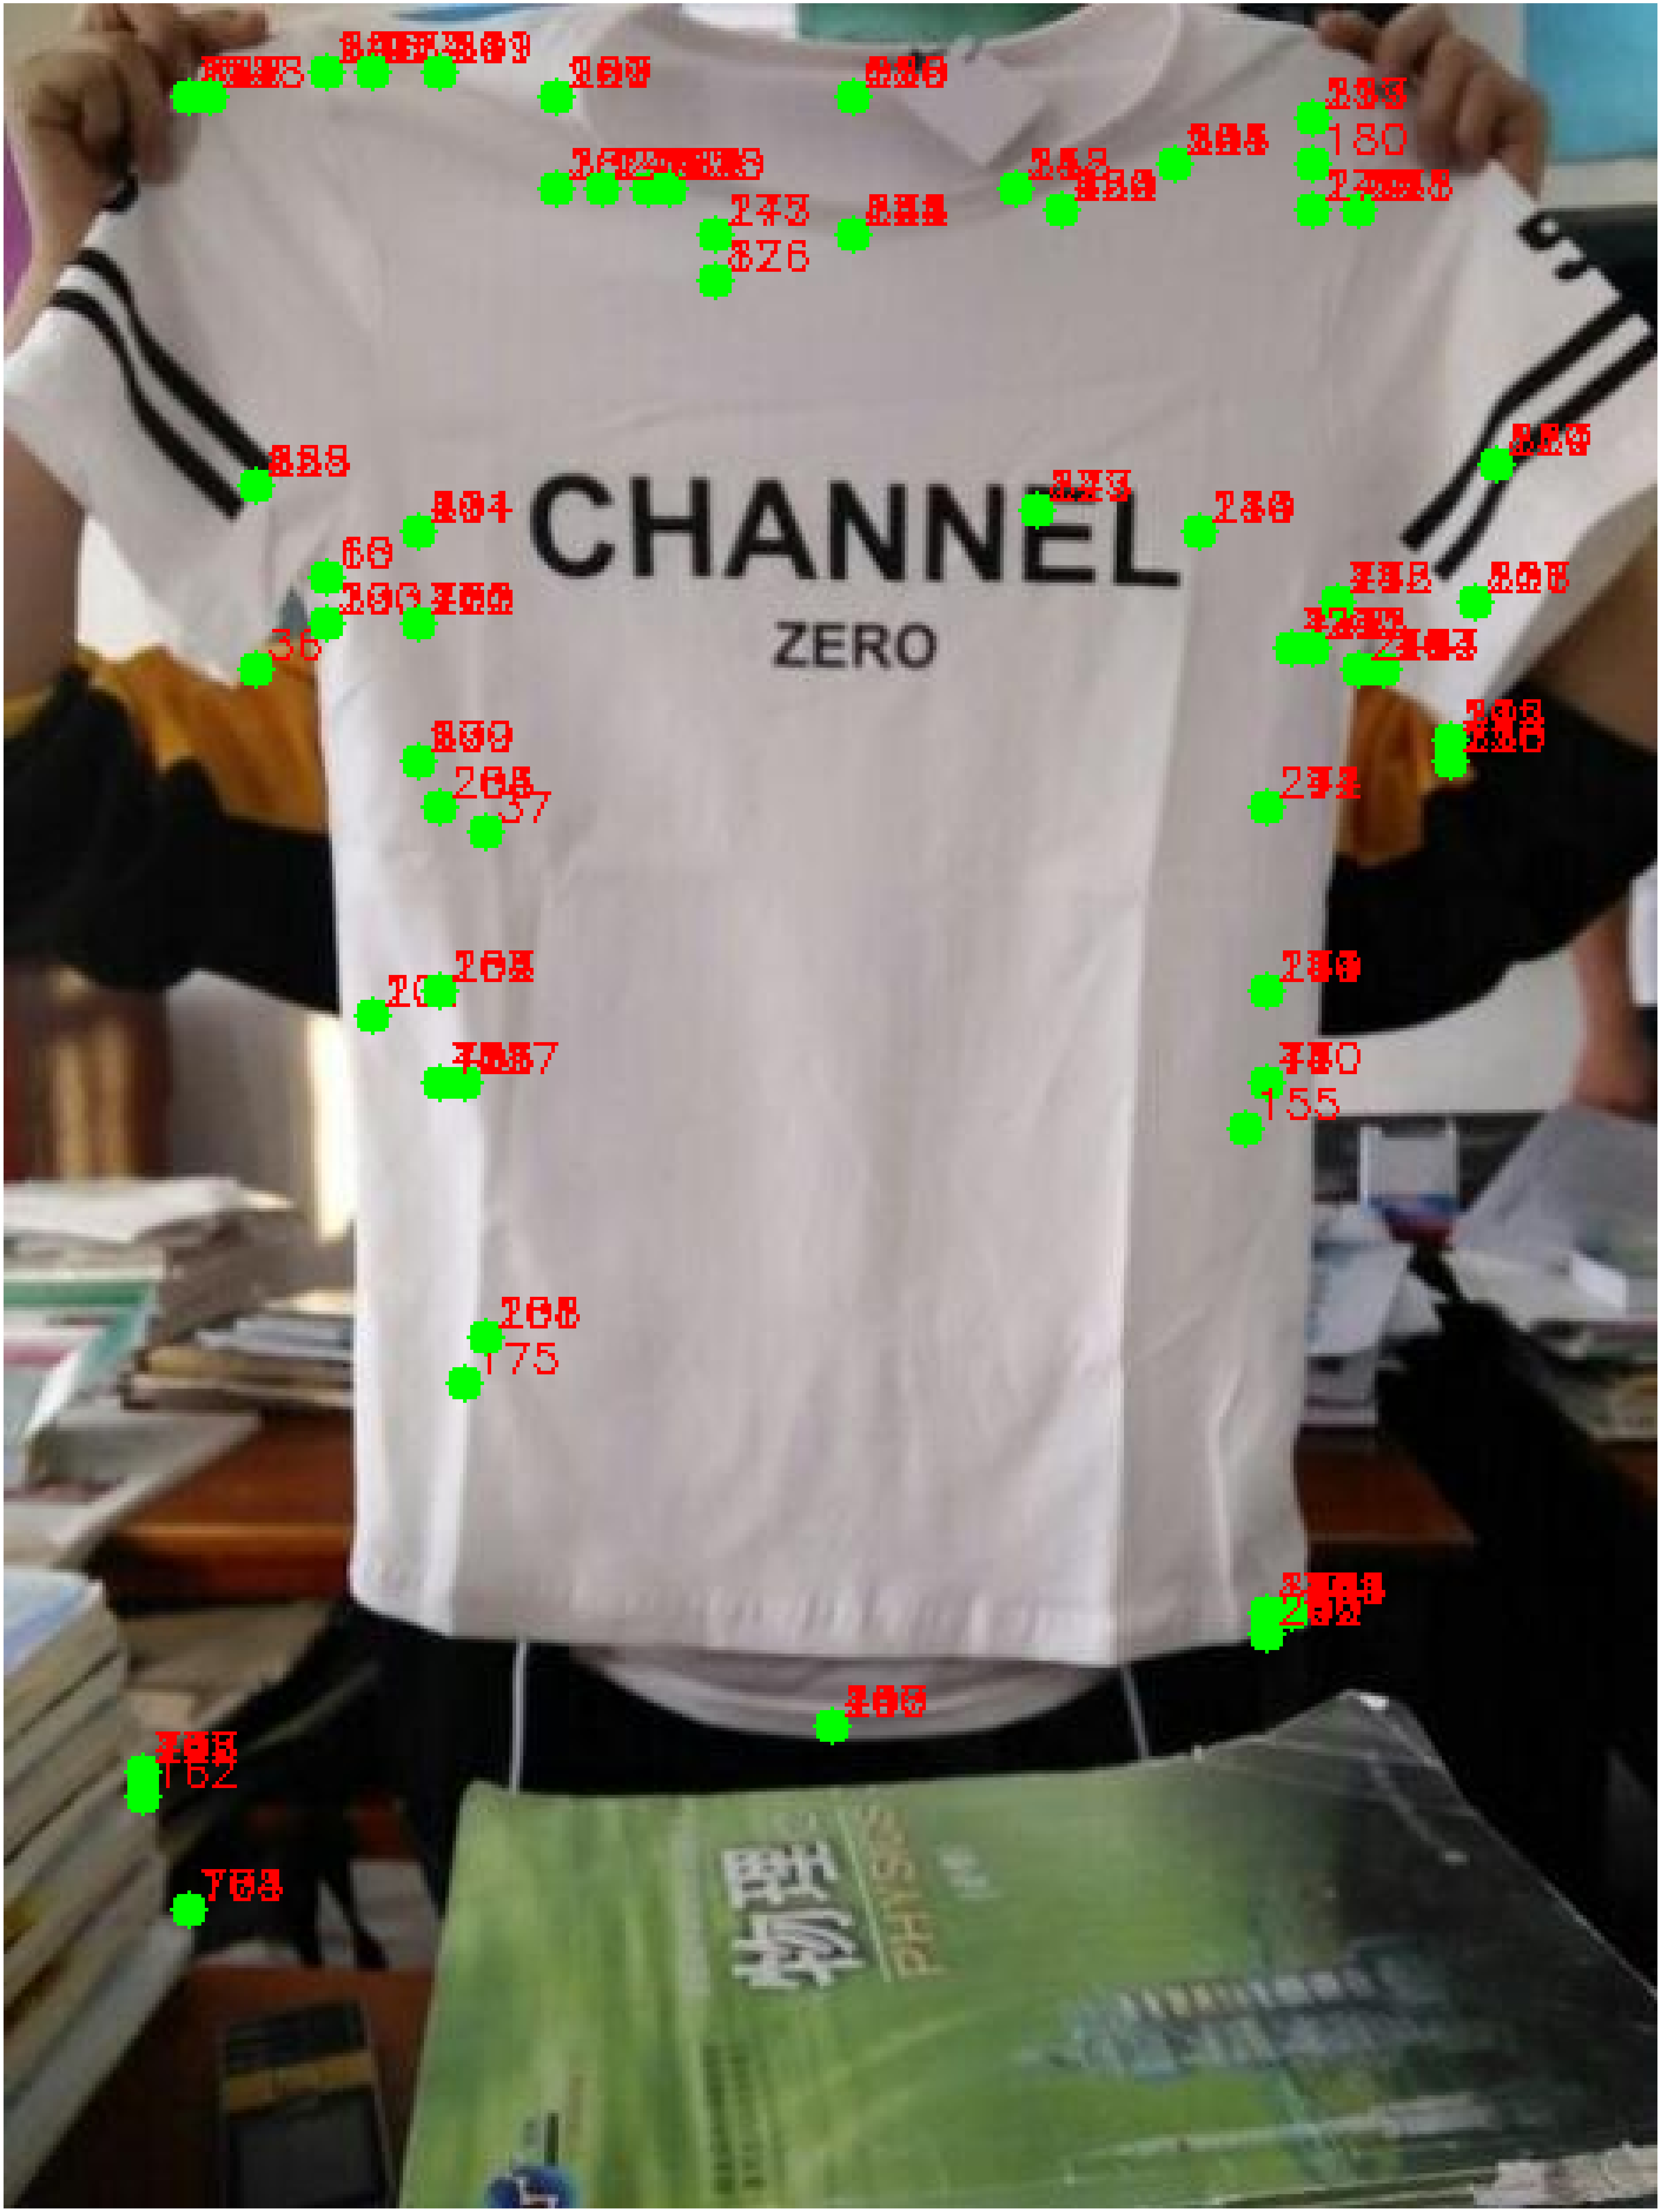

In [108]:
draw = img.copy()

for i, (x, y) in enumerate(points):
    cv2.circle(draw, (int(x), int(y)), 5, (0,255,0), -1)
    cv2.putText(draw, str(i),
                (int(x)+3, int(y)-3),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.4, (255,0,0), 1)

plt.figure(figsize=(60,100))
plt.imshow(draw)
plt.axis("off")


In [109]:
# pick only these joint indices (<=20)
SELECTED_JOINT_IDS = [
    0,   # waist_left (approx)
    1,   # waist_right
    4,   # hip_left
    5,   # hip_right
    8,   # knee_left
    9,   # knee_right
    12,  # ankle_left
    13,  # ankle_right
    16,  # outer_ankle_left
    17,  # outer_ankle_right
    20,  # crotch
    24,  # mid_thigh_left
    25,  # mid_thigh_right
    30,  # hem_left
    31,  # hem_right
    35   # bottom_center
]


In [110]:
heatmaps = out.squeeze(0).cpu().numpy()
hm_h, hm_w = heatmaps.shape[1:]

points = []

for jid in SELECTED_JOINT_IDS:
    hm = heatmaps[jid]
    y, x = np.unravel_index(np.argmax(hm), hm.shape)

    x_img = x * W / hm_w
    y_img = y * H / hm_h

    points.append((jid, x_img, y_img))


In [111]:
JOINT_NAMES = {
    0: "waist_L",
    1: "waist_R",
    4: "hip_L",
    5: "hip_R",
    8: "knee_L",
    9: "knee_R",
    12: "ankle_L",
    13: "ankle_R",
    16: "out_ankle_L",
    17: "out_ankle_R",
    20: "crotch",
    24: "thigh_L",
    25: "thigh_R",
    30: "hem_L",
    31: "waist_L",
    35: "bottom_mid"
}


(-0.5, 467.5, 623.5, -0.5)

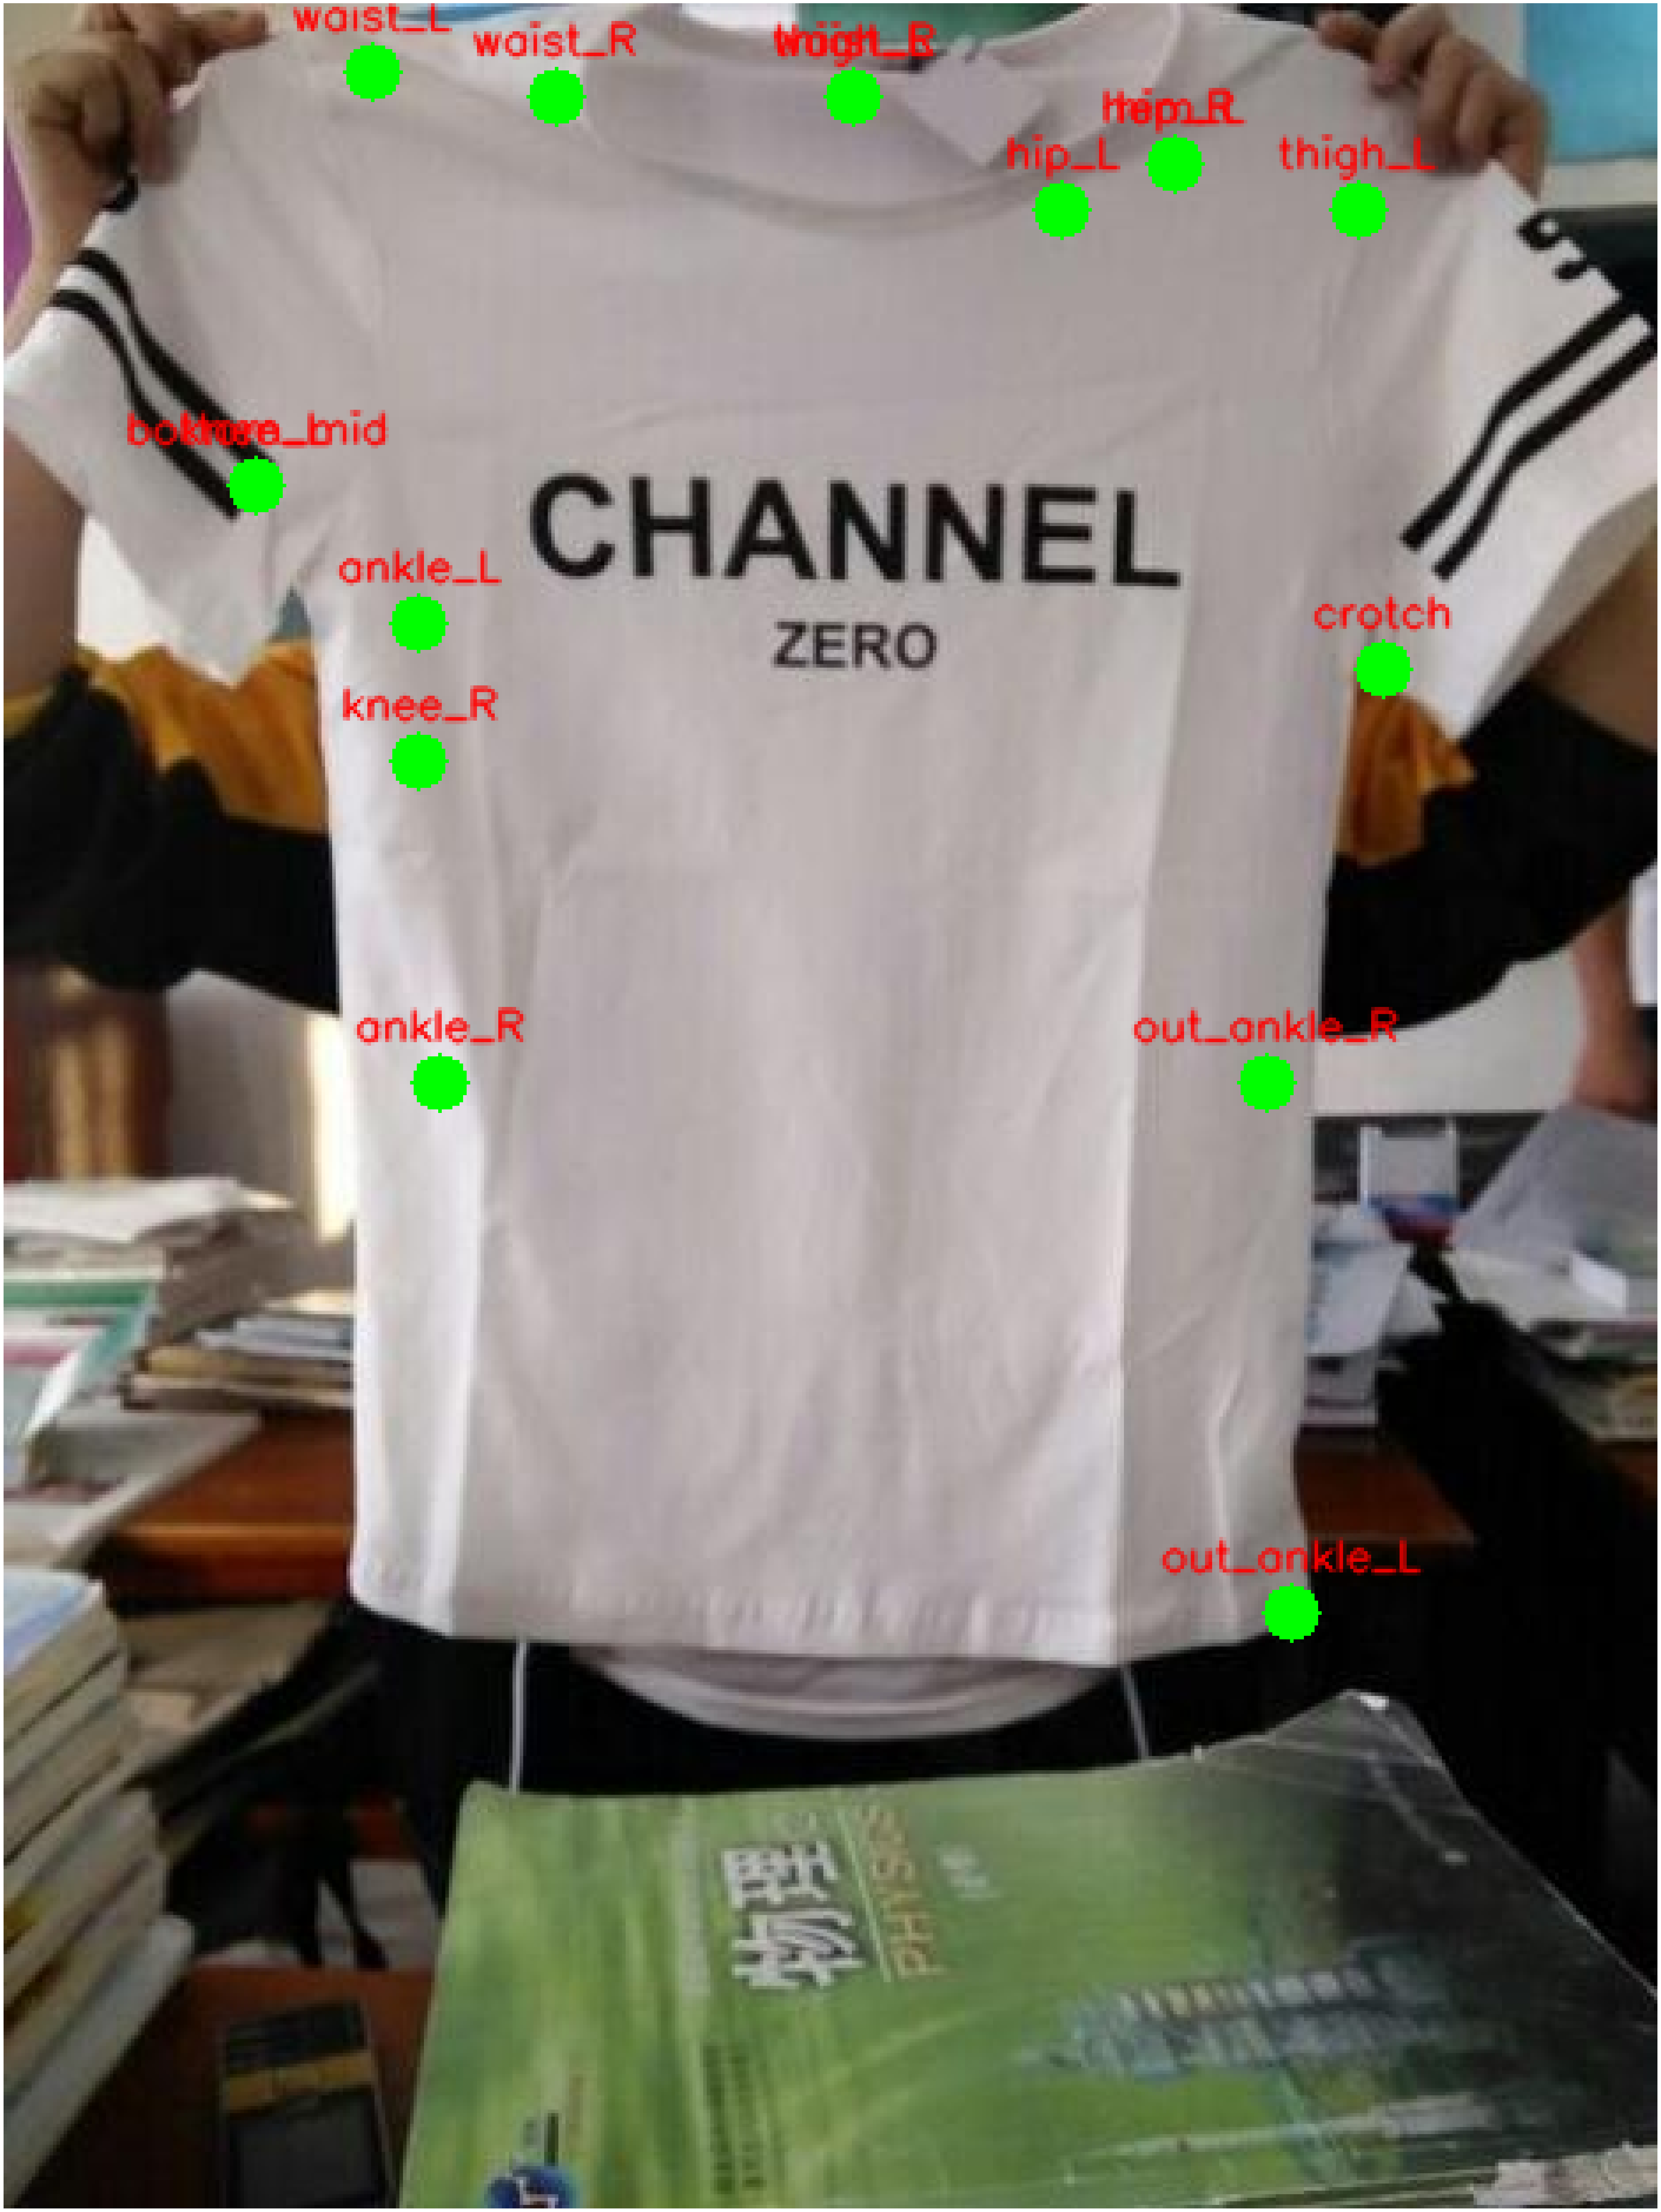

In [112]:
draw = img.copy()

POINT_RADIUS = 8          # increased
FONT_SCALE = 0.4         # increased
THICKNESS = 1

for jid, x, y in points:
    x, y = int(x), int(y)
    label = JOINT_NAMES.get(jid, f"id_{jid}")

    # draw point
    cv2.circle(draw, (x, y), POINT_RADIUS, (0, 255, 0), -1)

    # center text
    (tw, th), _ = cv2.getTextSize(
        label, cv2.FONT_HERSHEY_SIMPLEX, FONT_SCALE, THICKNESS
    )
    cv2.putText(
        draw,
        label,
        (x - tw // 2, y - POINT_RADIUS - 4),
        cv2.FONT_HERSHEY_SIMPLEX,
        FONT_SCALE,
        (255, 0, 0),
        THICKNESS,
        cv2.LINE_AA
    )

plt.figure(figsize=(60,100))
plt.imshow(draw)
plt.axis("off")


SAM+hrnet

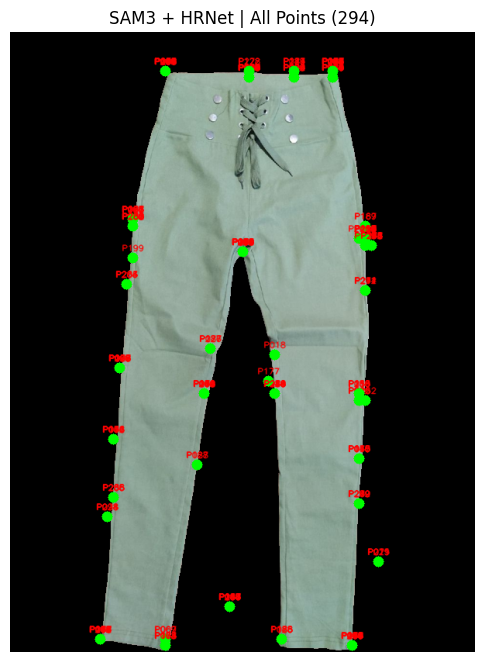

In [95]:
# ======================================================
# SAM3 + HRNet (ALL POINTS, ONE CELL, STABLE)
# ======================================================

import sys, cv2, torch, argparse
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------
# USER CONFIG
# -------------------------
IMAGE_PATH = "/content/0c99f0b4-3a0d-4d24-bfdd-e9e98914892c.jpg"
PROMPT = "pant"

TARGET_W, TARGET_H = 600, 800   # final working resolution

POINT_RADIUS = 7
FONT_SCALE = 0.35
THICKNESS = 1

# -------------------------
# LOAD & RESIZE IMAGE
# -------------------------
image_pil = Image.open(IMAGE_PATH).convert("RGB")
image_pil = image_pil.resize((TARGET_W, TARGET_H))
img_rgb = np.array(image_pil)
H, W = img_rgb.shape[:2]

# =====================================================
# SAM3 SEGMENTATION
# =====================================================
inference_state = processor.set_image(image_pil)
inference_state = processor.set_text_prompt(
    state=inference_state,
    prompt=PROMPT
)
detections = from_sam(sam_result=inference_state)

try:
    detections = detections[detections.confidence > 0.5]
except Exception:
    pass

# ---------- robust SAM mask extractor ----------
def extract_mask(det):
    if hasattr(det, "mask"):
        return np.asarray(det.mask)

    if isinstance(det, dict):
        for k in ["mask", "masks", "segmentation", "segm", "pred_mask", "pred_masks"]:
            if k in det:
                return np.asarray(det[k])

    if isinstance(det, (list, tuple)):
        for item in det:
            if isinstance(item, np.ndarray) and item.ndim >= 2:
                return item
            try:
                arr = np.asarray(item)
                if arr.ndim >= 2:
                    return arr
            except Exception:
                pass
    return None

masks = []
for d in detections:
    m = extract_mask(d)
    if m is None:
        continue
    if m.ndim == 3:
        m = np.squeeze(m)
    if m.shape != (H, W):
        m = cv2.resize(
            (m > 0).astype(np.uint8),
            (W, H),
            interpolation=cv2.INTER_NEAREST
        )
    masks.append(m.astype(bool))

if len(masks) == 0:
    raise RuntimeError("❌ SAM did not return any usable mask")

best_mask = masks[np.argmax([m.sum() for m in masks])]

# apply mask (black background)
masked_img = np.zeros_like(img_rgb)
masked_img[best_mask] = img_rgb[best_mask]

# =====================================================
# HRNET LOAD
# =====================================================
sys.path.append("/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/lib")

from config import cfg, update_config
import models

cfg_file = "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/experiments/deepfashion2/hrnet/w48_384x288_adam_lr1e-3.yaml"

args = argparse.Namespace(
    cfg=cfg_file,
    opts=[],
    modelDir='',
    logDir='',
    dataDir='',
    prevModelDir=''
)

update_config(cfg, args)

hrnet = models.pose_hrnet.get_pose_net(cfg, is_train=False)
hrnet.load_state_dict(
    torch.load(
        "/content/HRNet-for-Fashion-Landmark-Estimation.PyTorch/models/pose_hrnet-w48_384x288-deepfashion2_mAP_0.7017.pth",
        map_location="cpu"
    ),
    strict=False
)
hrnet.eval()

# =====================================================
# HRNET INFERENCE (ON MASKED IMAGE)
# =====================================================
inp = cv2.resize(masked_img, (288, 384))   # (W,H) from YAML
inp = inp.astype(np.float32) / 255.0
inp = inp.transpose(2, 0, 1)
inp = torch.from_numpy(inp).unsqueeze(0)

with torch.no_grad():
    out = hrnet(inp)

heatmaps = out.squeeze(0).cpu().numpy()
num_joints = heatmaps.shape[0]
hm_h, hm_w = heatmaps.shape[1:]

# =====================================================
# USE ALL POINTS + SYSTEMATIC NAMES
# =====================================================
points = []

for jid in range(num_joints):
    hm = heatmaps[jid]
    y, x = np.unravel_index(np.argmax(hm), hm.shape)

    x_img = x * W / hm_w
    y_img = y * H / hm_h

    points.append((jid, x_img, y_img))

# generic naming (YOU will remap later)
JOINT_NAMES = {
    jid: f"P{jid:03d}" for jid in range(num_joints)
}

# =====================================================
# DRAW POINTS + LABELS ON MASKED IMAGE
# =====================================================
draw = masked_img.copy()

for jid, x, y in points:
    x, y = int(x), int(y)
    label = JOINT_NAMES[jid]

    cv2.circle(draw, (x, y), POINT_RADIUS, (0, 255, 0), -1)

    (tw, th), _ = cv2.getTextSize(
        label,
        cv2.FONT_HERSHEY_SIMPLEX,
        FONT_SCALE,
        THICKNESS
    )

    cv2.putText(
        draw,
        label,
        (x - tw // 2, y - POINT_RADIUS - 2),
        cv2.FONT_HERSHEY_SIMPLEX,
        FONT_SCALE,
        (255, 0, 0),
        THICKNESS,
        cv2.LINE_AA
    )

# =====================================================
# SHOW RESULT
# =====================================================
plt.figure(figsize=(6, 10))
plt.imshow(draw)
plt.axis("off")
plt.title(f"SAM3 + HRNet | All Points ({num_joints})")
plt.show()
